## Cleaning Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding = 'unicode_escape')

In [3]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [5]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [6]:
df.is_there_an_emotion_directed_at_a_brand_or_product.isna().sum()

0

In [7]:
df.emotion_in_tweet_is_directed_at.isna().sum()

5802

In [10]:
df.shape

(9093, 3)

In [11]:
df.columns=['tweet','company','emotion']

In [12]:
df

,tweet,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [13]:
df[df.company.isna()]

,tweet,company,emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [14]:
"iPad" in df.tweet[5]

True

In [15]:
"iPad" in df.tweet[5].split()

True

In [16]:
df.tweet[9092]

'\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'

In [17]:
df[df.emotion=='No emotion toward brand or product'].company.value_counts()

iPad                               24
Apple                              21
Google                             15
iPad or iPhone App                 10
iPhone                              9
Other Google product or service     9
Other Apple product or service      1
Android                             1
Android App                         1
Name: company, dtype: int64

In [18]:
df[df.emotion=='No emotion toward brand or product'].company.isna().sum()

5298

In [19]:
punctuation=[",",".","#","!","@","$","?","$","%","&","-","_"]
apple=['iPhone',"iPad&quot;","iphone ",'i Pad','i Pad',"Apple.","iPad?","#iPad","#iPhone",'iPad','Mac',"iphone,",'iPod','ipod','ipad','mac','Apple','apple','Apple\'s','apple\'s',"#Apple",'#apple','I-Pad']
google=['Google','google','android','Android','Google.','android,',"#android",'Google\'s','google\'s','googles' ,'#google','#Google']
df.tweet[5].split()in apple

False

In [20]:
for index in list(df[df.company.isna()].tweet.dropna().index):
    tweet = ' '.join(i for i in df.tweet[index] if not i in punctuation)
    if bool(set(tweet.split())&set(apple)) == True:
        df.company[index]='Apple'
    if bool(set(tweet.split())&set(google)) == True:
        df.company[index]='Google'
    

In [21]:
df.company.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: company, dtype: int64

In [22]:
df.company.isna().sum()

5802

In [23]:
 df[df.company.isna()].tweet.head(50)

5      @teachntech00 New iPad Apps For #SpeechTherapy...
6                                                    NaN
16     Holler Gram for iPad on the iTunes App Store -...
32     Attn: All  #SXSW frineds, @mention Register fo...
33         Anyone at  #sxsw want to sell their old iPad?
34     Anyone at  #SXSW who bought the new iPad want ...
35     At #sxsw.  Oooh. RT @mention Google to Launch ...
37     SPIN Play - a new concept in music discovery f...
39     VatorNews - Google And Apple Force Print Media...
41     HootSuite - HootSuite Mobile for #SXSW ~ Updat...
42     Hey #SXSW - How long do you think it takes us ...
43     Mashable! - The iPad 2 Takes Over SXSW [VIDEO]...
44     For I-Pad ?RT @mention New #UberSocial for #iP...
46     Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...
48     Orly....? ÛÏ@mention Google set to launch new...
50     Khoi Vinh (@mention says Conde Nast's headlong...
51     ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS...
52     ÷¼ WHAT? ÷_ {link} ã_

In [24]:
df.tweet[123]

'Funny how #Austin is trending but not #SXSW. Only a matter of minutes at this point (at least according to Twitter for iPhone).'

In [25]:
tweet.strip(punctuation)

TypeError: strip arg must be None or str

In [26]:
df.shape


(9093, 3)

In [27]:
9093-1147

7946

## Data Visualization

In [84]:
df[['company','emotion','tweet']].groupby(['company','emotion']).count()


tweet
company                         emotion                                  
Android                         Negative emotion                        8
                                No emotion toward brand or product      1
                                Positive emotion                       69
Android App                     Negative emotion                        8
                                No emotion toward brand or product      1
                                Positive emotion                       72
Apple                           I can't tell                            2
                                Negative emotion                       95
                                No emotion toward brand or product     21
                                Positive emotion                      543
Google                          I can't tell                            1
                                Negative emotion                       68
                                No emotion toward brand or product     15
                                Positive emotion                      346
Other Apple product or service  Negative emotion                        2
                                No emotion toward brand or product      1
                                Positive emotion                       32
Other Google product or service I can't tell                            1
                                Negative emotion                       47
                                No emotion toward brand or product      9
                                Positive emotion                      236
iPad                            I can't tell                            4
                                Negative emotion                      125
                                No emotion toward brand or product     24
                                Positive emotion                      793
iPad or iPhone App              Negative emotion                       63
                                No emotion toward brand or product     10
                                Positive emotion                      397
iPhone                          I can't tell                            1
                                Negative emotion                      103
                                No emotion toward brand or product      9
                                Positive emotion                      184

In [41]:
plt.style.use('classic')
df.head()

,tweet,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [50]:
df.isna().sum()

tweet         1
company    5802
emotion       0
dtype: int64

In [42]:
df.company.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: company, dtype: int64

Text(0, 0.5, 'Number of Tweets')

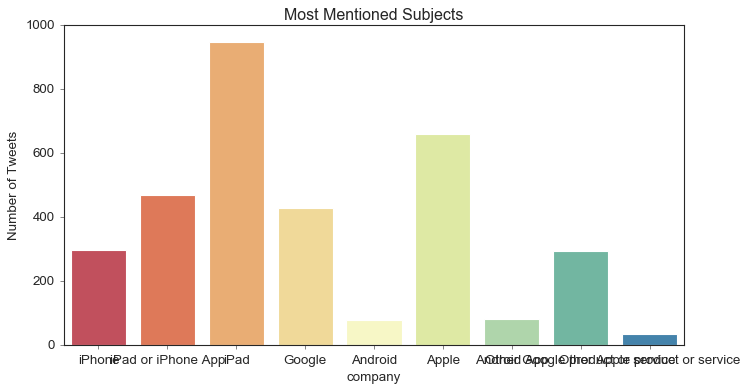

In [77]:
sns.set_style("ticks")
plt.figure(figsize = (10, 5))
sns.countplot(df['company'], alpha = 1, palette="Spectral")
plt.title('Most Mentioned Subjects')
plt.ylabel('Number of Tweets')